# Augmentation

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from ssd.core.inference import toVisualizeRectangleimg

# Geometric distortions

## Random Expand

[[558  99 917 379]]
(558, 99) (917, 379)


<IPython.core.display.Javascript object>


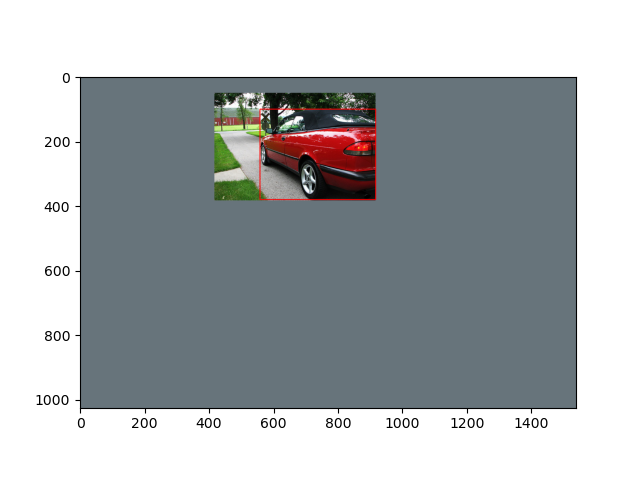

[[148 357 263 523]]
(148, 357) (263, 523)


<IPython.core.display.Javascript object>


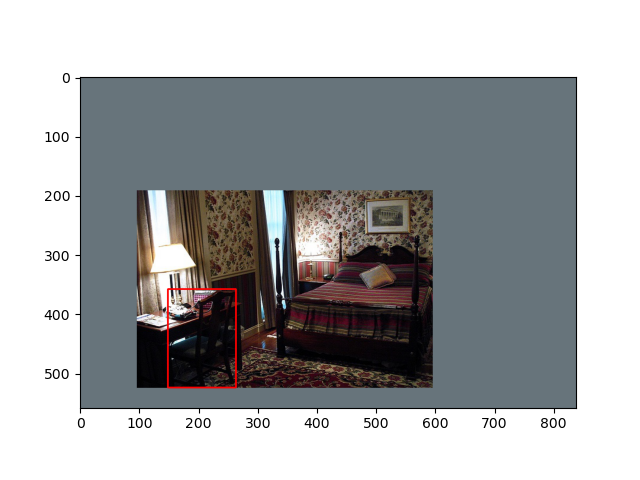

[[166 181 327 323]]
(166, 181) (327, 323)


<IPython.core.display.Javascript object>


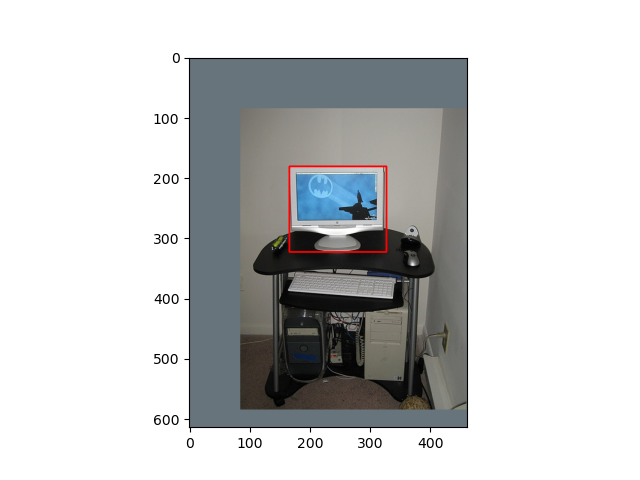

[[ 930  598 1416  783]]
(930, 598) (1416, 783)


<IPython.core.display.Javascript object>


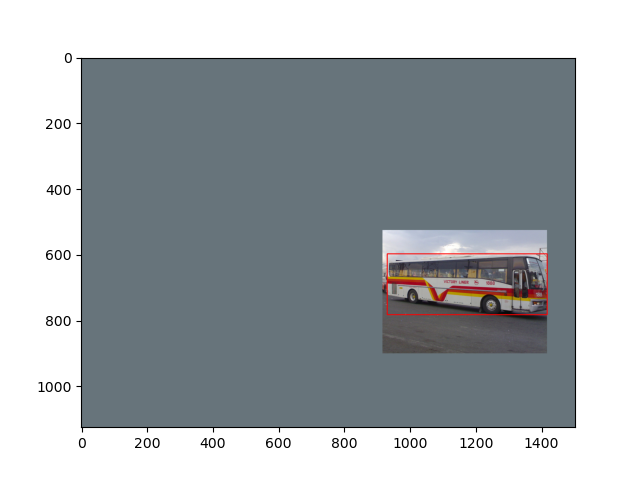

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.ToTensor()]
)

target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 97   9 443 289]]
(97, 9) (443, 289)


<IPython.core.display.Javascript object>


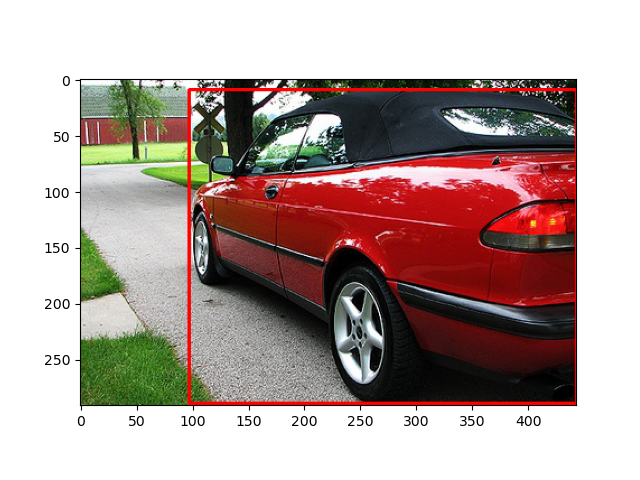

[[321 904 436 970]]
(321, 904) (436, 970)


<IPython.core.display.Javascript object>


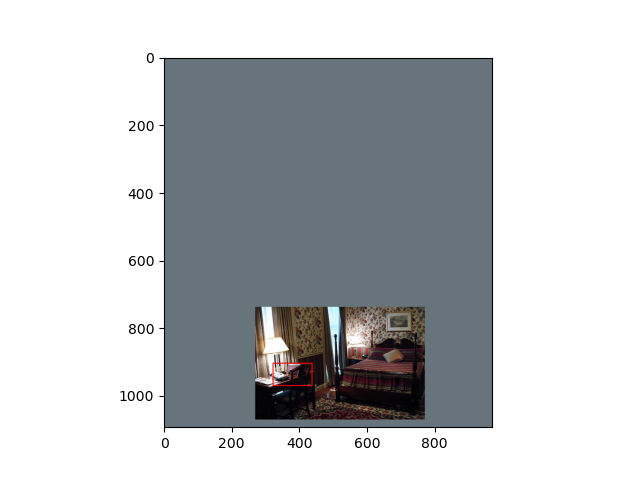

[[530 867 690 986]]
(530, 867) (690, 986)


<IPython.core.display.Javascript object>


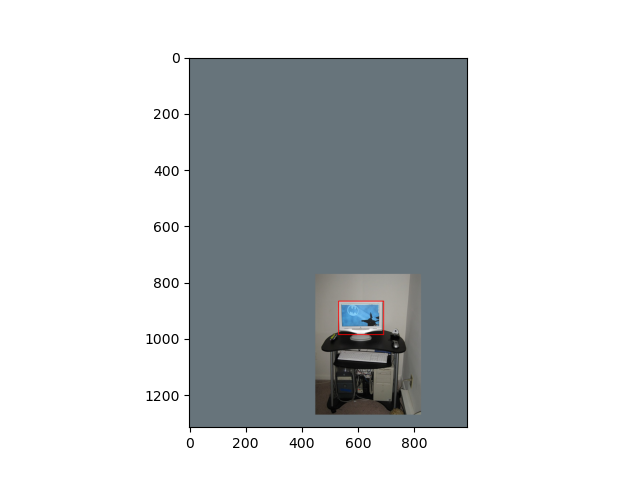

[[  0  34 367 218]]
(0, 34) (367, 218)


<IPython.core.display.Javascript object>


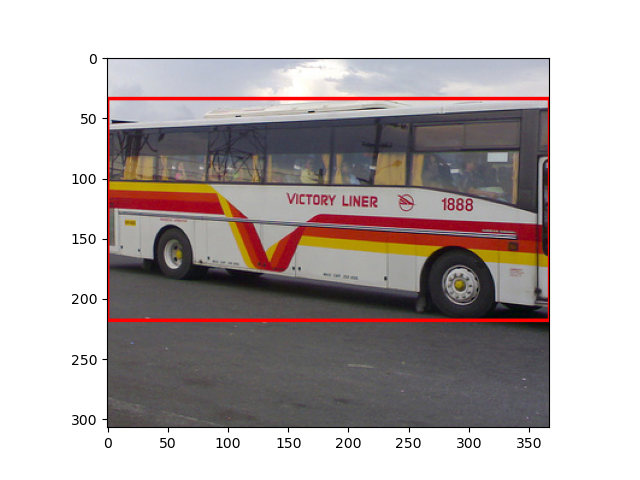

In [3]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0  50 359 330]]
(0, 50) (359, 330)


<IPython.core.display.Javascript object>


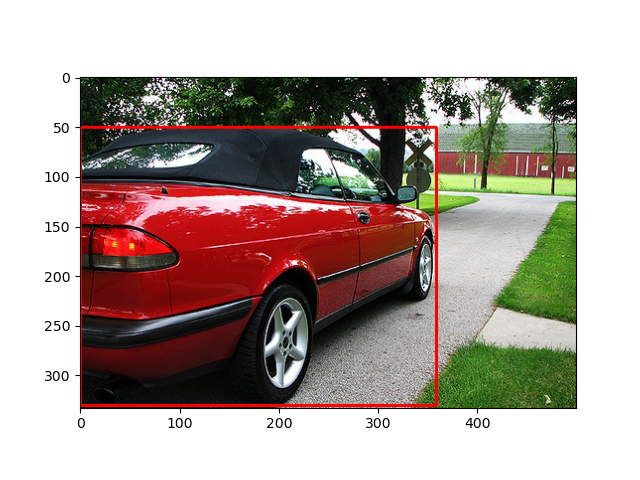

[[333 166 448 332]]
(333, 166) (448, 332)


<IPython.core.display.Javascript object>


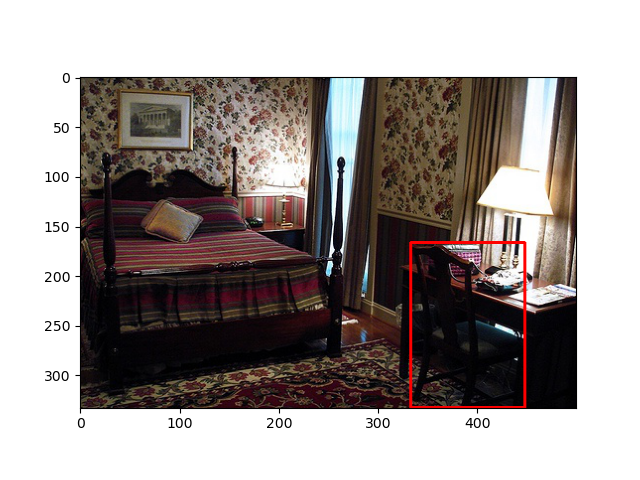

[[132  95 293 238]]
(132, 95) (293, 238)


<IPython.core.display.Javascript object>


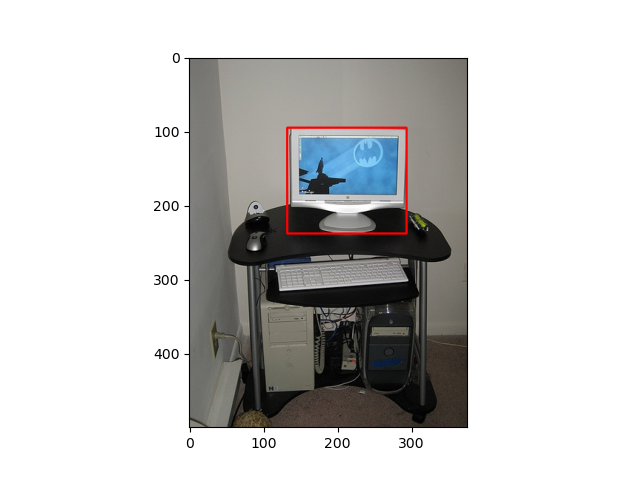

[[  0  73 486 257]]
(0, 73) (486, 257)


<IPython.core.display.Javascript object>


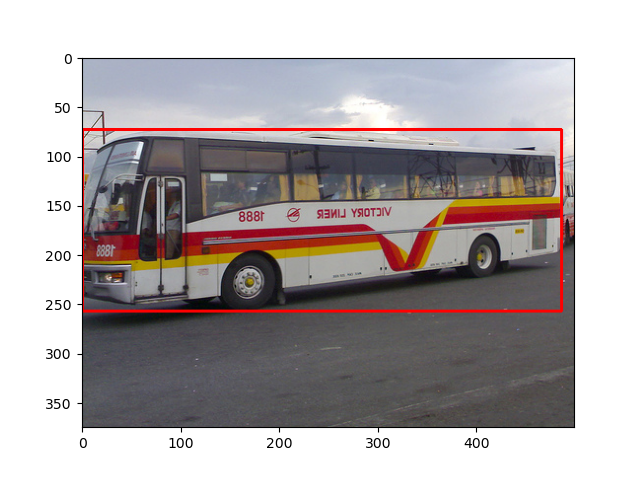

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)